In [23]:
from pathlib import Path
import sys
import shutil
from itertools import product
from typing import List, Dict
import logging
import shutil 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
from joblib import Parallel, delayed
from tqdm import tqdm

from catsyn_config_generator import CatsynConfigFeedstock
from conductor import run_synthesis

from tqdm_joblib import tqdm_joblib


def run_experiment(root, config):
    config = next(config.permute_configs())
    experiment_path = root / config.experiment_name
    if experiment_path.exists():
        shutil.rmtree(experiment_path)
    experiment_path.mkdir(parents=True, exist_ok=True)
    config.generate_and_save_config(experiment_path)
    # Generate the synthetic data
    run_synthesis(config, experiment_path=experiment_path, save=False)
    # Read in the resulting data
    df = get_syn_df(experiment_path)

    # if experiment_path.exists():
    #     shutil.rmtree(experiment_path)
    return df, experiment_path


def get_syn_df(experiment_path: Path) -> np.array:
    csv_path = next(experiment_path.glob("*.csv"))
    return pd.read_csv(csv_path)


def get_config_from_dist(dist, dist_kwargs):
    if dist == "zipf_shuffle":
        DISTRIBUTION = [("zipf_shuffle", {"a": float(dist_kwargs["a"])})]
    elif dist == "normal":
        DISTRIBUTION=[("normal", {"scale": float(dist_kwargs["scale"])}),]
    elif dist == "hotspot_shuffle":
        DISTRIBUTION=[("hotspot_shuffle", {
            "num_hotspot_bins": int(dist_kwargs["num_hotspot_bins"]), 
            "hotspot_factor": float(dist_kwargs["hotspot_factor"])
        }),]
    else:
        raise ValueError()

    config = CatsynConfigFeedstock(
        NB_PATIENTS=int(dist_kwargs["patients"]),
        NB_STATES=int(dist_kwargs["states"]),
        NB_VARIABLES=int(dist_kwargs.get("variables", 1)),
        NB_BINS=int(dist_kwargs["bins"]),
        DISTRIBUTION=DISTRIBUTION,
        MODEL=dist_kwargs["MODEL"],
        MIN_START_STATES=1,
        MIN_END_STATES=1,
        PERSISTENCE_MIN=float(dist_kwargs["persistence_min"]),
        PERSISTENCE_MAX=float(dist_kwargs["persistence_max"]),
        SEED=24,
    )
    return config

## Generate random graphs

# default_kwargs = {
#     "patients": 100,
#     "states": 8,
#     "bins": 10,
#     "persistence_min": 0.5,
#     "persistence_max": 0.5,
#     # "MODEL": [("directed_extended_barabasi_albert_graph", None)],
#     "MODEL": [("gnp_random_graph", {"n": 8, "p": 0.2, "seed": 24})],
# }
# config = get_config_from_dist("zipf_shuffle", {"a": 2, **default_kwargs})

# directory = Path("thesis_figures/4")
# directory.mkdir(parents=True, exist_ok=True)
# df, experiment_name = run_experiment(directory, config)

# if (directory / "gnp_random_graph_example").exists():
#     shutil.rmtree(directory / "gnp_random_graph_example")

# shutil.copytree(experiment_name, directory / "gnp_random_graph_example")
# shutil.rmtree(experiment_name)

# shutil.copy(directory / "gnp_random_graph_example" / "graph.pdf", directory / "gnp_random_graph_example.pdf")


# default_kwargs = {
#     "patients": 100,
#     "states": 8,
#     "bins": 10,
#     "persistence_min": 0.5,
#     "persistence_max": 0.5,
#     # "MODEL": [("directed_extended_barabasi_albert_graph", None)],#{"n": 8, "m": 1, "p": 0.1, "q": 0,})],
#     "MODEL": [("directed_extended_barabasi_albert_graph", {"n": 8, "m": 1, "p": 0.1, "q": 0, "seed": 42})],
#     # "MODEL": [("gnp_random_graph", {"n": 8, "p": 0.2, "seed": 24})],
# }
# config = get_config_from_dist("zipf_shuffle", {"a": 2, **default_kwargs})

# directory = Path("thesis_figures/4")
# df, experiment_name = run_experiment(directory, config)

# if (directory / "directed_extended_barabasi_albert_graph_example").exists():
#     shutil.rmtree(directory / "directed_extended_barabasi_albert_graph_example")

# shutil.copytree(experiment_name, directory / "directed_extended_barabasi_albert_graph_example")
# shutil.rmtree(experiment_name)

# shutil.copy(directory / "directed_extended_barabasi_albert_graph_example" / "graph.pdf", directory / "directed_extended_barabasi_albert_graph_example.pdf")

default_kwargs = {
    "patients": 100,
    "states": 16,
    "bins": 10,
    "persistence_min": 0.5,
    "persistence_max": 0.5,
    # "MODEL": [("directed_extended_barabasi_albert_graph", None)],#{"n": 8, "m": 1, "p": 0.1, "q": 0,})],
    "MODEL": [("binomial_tree", {"n": 4})],
    # "MODEL": [("gnp_random_graph", {"n": 8, "p": 0.2, "seed": 24})],
}
config = get_config_from_dist("zipf_shuffle", {"a": 2, **default_kwargs})

directory = Path("thesis_figures/4")
df, experiment_name = run_experiment(directory, config)

if (directory / "binomial_tree_example").exists():
    shutil.rmtree(directory / "binomial_tree_example")

shutil.copytree(experiment_name, directory / "binomial_tree_example")
shutil.rmtree(experiment_name)

shutil.copy(directory / "binomial_tree_example" / "graph.pdf", directory / "directed_binomial_tree_example.pdf")


/opt/conda/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

PosixPath('thesis_figures/4/directed_binomial_tree_example.pdf')

In [16]:
default_kwargs = {
    "patients": 1000,
    "states": 16,
    "bins": 1000,
    "variables": 3,
    "persistence_min": 0.5,
    "persistence_max": 0.5,
    # "MODEL": [("directed_extended_barabasi_albert_graph", None)],
    "MODEL": [("gnp_random_graph", {"n": 16, "p": 0.1, "seed": 24})],
}
config = get_config_from_dist("zipf_shuffle", {"a": 2, **default_kwargs})

directory = Path("thesis_figures/5")
directory.mkdir(parents=True, exist_ok=True)
df, experiment_name = run_experiment(directory, config)

if (directory / "encoding_experiment").exists():
    shutil.rmtree(directory / "encoding_experiment")

shutil.copytree(experiment_name, directory / "encoding_experiment")
shutil.rmtree(experiment_name)

df = pd.read_csv(next((directory / "encoding_experiment").rglob("*.csv")))


INFO:conductor:Generating synthetic data.
100%|██████████| 1000/1000 [00:01<00:00, 558.81it/s]
INFO:catsyn.catsyn:Synthesising None events.
INFO:catsyn.catsyn:Synthetic dataset saved to: /workspaces/defrag/thesis_figures/5/experiment_1cf912d/syn_077fd0b.csv
INFO:catsyn.catsyn:State graph saved to: /workspaces/defrag/thesis_figures/5/experiment_1cf912d/graph.png
INFO:conductor:Removing 0 patients from synthetic data since they're too short.


In [20]:
!python3 thesis_5_event_encoding_experiment.py

/opt/conda/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

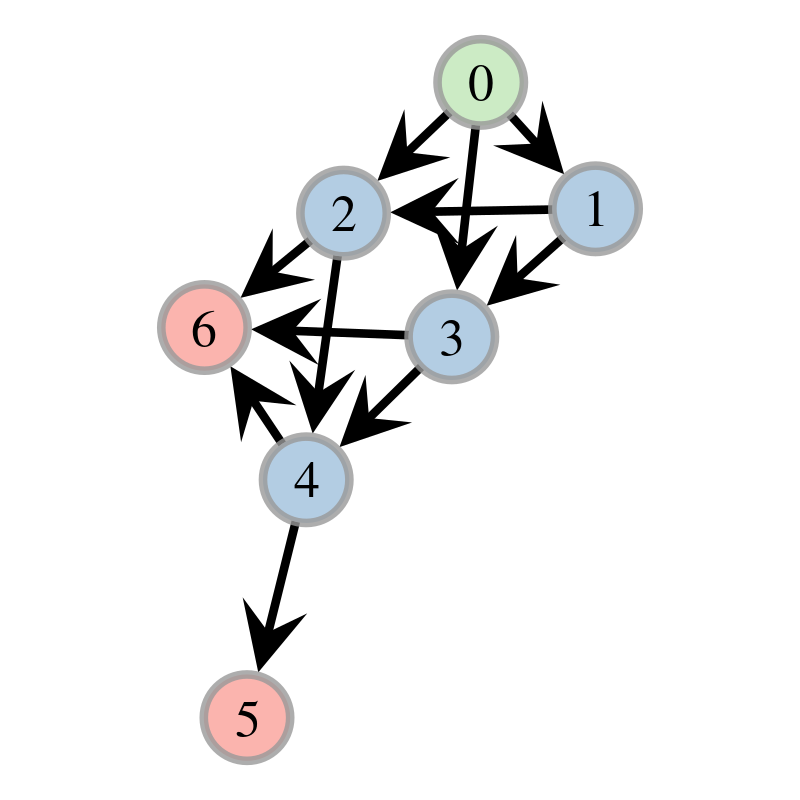

/tmp/ipykernel_2127432/3360944405.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Pastel1")


<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8aca3b9270, at 0x7f8bb453a9b0>

In [12]:
from pathlib import Path

import graph_tool as gt
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
# import colormap
from matplotlib import cm
from graph_tool.draw import graph_draw as gt_graph_draw
from graph_tool.draw import sfdp_layout

from plot import cmap40

from defrag import Defrag

adjacency_matrix = np.array([
    [0, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
])

G = nx.from_numpy_matrix(adjacency_matrix, create_using=nx.DiGraph)
gtG = Defrag.nx2gt(G)
Defrag.plot_gtG_from_nxG(G, size=(400,400))


num_alpha_mapping = Defrag.alphabet_mapping()
# Draw the graph using graph-tool, because it makes prettier graphs.
# Colour the nodes according to their start/end node status
cmap = cm.get_cmap("Pastel1")
cmap = {
    "wh": (1., 1., 1., 1.),
    "r": (*cmap.colors[0], 1.),  # chemo
    "g": (*cmap.colors[2], 1.),  # surgery
    "b": (*cmap.colors[1], 1.),  # radio
    "y": (*cmap.colors[5], 1.),  # endo
}
# Colour the nodes according to their colour in the embedding plot
# colour_list = cmap12
# colour_list *= 5
colour_list = cmap40
colour_list *= 20

# Create vertex properties
color = gtG.new_vertex_property("vector<double>")  # colour by position
plot_color = gtG.new_vertex_property("vector<double>")  # colour by cluster
alphabetic_idx = gtG.new_vertex_property("string")
edge_color = gtG.new_edge_property("vector<double>")
# pen_width = gtG.new_vertex_property("float")
# add the properties to graph
gtG.vertex_properties["color"] = color
gtG.vertex_properties["plot_color"] = plot_color
gtG.vertex_properties["alphabetic_idx"] = alphabetic_idx
# gtG.vertex_properties["pen_width"] = pen_width
# assign a value to that property for each node of that graph
# Sort graph vertices to align colouring with embedding
for idx, v in enumerate(list(gtG.vertices())):
# for v in gtG.vertices():
    # print(v, num_alpha_mapping[v], type(v))#, v.vertex_index, type(v.vertex_index))
    alphabetic_idx[v] = num_alpha_mapping[v]
    if idx == 0:
        color[v] = cmap["wh"]
    if idx in [1, 4]:
        color[v] = cmap["r"]
    if idx in [2, 3]:
        color[v] = cmap["g"]
    if idx in [5]:
        color[v] = cmap["b"]
    if idx in [6]:
        color[v] = cmap["y"]

for idx, (e) in enumerate(list(gtG.edges())):
    edge_color[e] = (0, 0, 0, gtG.ep["weight"][e])

vertex_fill_color = gtG.vertex_properties["color"] 

gt_graph_draw(
    gtG,
    pos=sfdp_layout(gtG, eweight=gtG.ep["weight"]),
    vertex_text=gtG.vertex_properties["alphabetic_idx"],
    output=str(Path("thesis_figures/2/breast_cancer_pathway.pdf")),
    # bg_color=None,
    bg_color=None,
    # vertex_color=gtG.vertex_properties["plot_color"],
    vertex_fill_color=vertex_fill_color,
    edge_color=edge_color,
    # vertex_pen_width=gtG.vertex_properties["pen_width"],
    fit_view=True,
    output_size=(500,500),
    adjust_aspect=False,
    # mplfig=axis
)



In [2]:
import pandas as pd

df = pd.read_parquet("mimic_feature_set.parquet")

In [22]:
pids = df[df.d_ccs_lv2 == "2.5"].subject_id.unique()
p_df = df[df.p_icd9_code != ""]
pids = p_df[p_df.subject_id.isin(p_df.subject_id.value_counts()[p_df.subject_id.value_counts() > 8].index)].subject_id.unique()
print(p_df[p_df.subject_id == pids[0]].p_icd9_code[:9])
print(p_df[p_df.subject_id == pids[3]].p_icd9_code[:9])
print(p_df[p_df.subject_id == pids[4]].p_icd9_code[:9])


828    9929
829    9604
830    9671
831    9915
832     966
833    9983
834    9671
835    9604
836    9960
Name: p_icd9_code, dtype: object
1285    9929
1286    9604
1287    9672
1288    3891
1289    3892
1290     966
1291    9983
1292    9904
1293    9905
Name: p_icd9_code, dtype: object
2446    9671
2447    9671
2448    9396
2449    9604
2450    3892
2451    9915
2452    9390
2453    9635
2454    9982
Name: p_icd9_code, dtype: object


In [25]:
from matplotlib import cm

cmap = cm.get_cmap("Pastel1")
cmap = {
    "wh": (1., 1., 1., 1.),
    "r": list(map(lambda x: int(x*256), (*cmap.colors[0], 1.))),  # chemo
    "g": list(map(lambda x: int(x*256), (*cmap.colors[2], 1.))),  # surgery
    "b": list(map(lambda x: int(x*256), (*cmap.colors[1], 1.))),  # radio
    "y": list(map(lambda x: int(x*256), (*cmap.colors[5], 1.))),  # endo
}
cmap


/tmp/ipykernel_69763/2928931742.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Pastel1")


{'wh': (1.0, 1.0, 1.0, 1.0),
 'r': [251, 180, 174, 256],
 'g': [204, 235, 197, 256],
 'b': [179, 205, 227, 256],
 'y': [256, 256, 204, 256]}

In [1]:
import numpy as np
import scipy.stats
import scipy.spatial
import pandas as pd


# mimic_fs = np.load("statistical_experiments/dataset_info.npz", allow_pickle=True)
ref_fs = np.load("statistical_experiments/new_dataset_info.npz", allow_pickle=True)["data"].item()
apdc_f = np.load("statistical_experiments/apdc_frequencies.npz")["f"]
apdc_f = apdc_f / apdc_f.sum()


def fix_lens(f1, f2):
    if len(f1) < len(f2):
        append_vals = np.zeros((len(f2) - len(f1))) + 1e-10
        f1 = np.append(f1, append_vals)

    if len(f2) < len(f1):
        append_vals = np.zeros((len(f1) - len(f2))) + 1e-10
        f2 = np.append(f2, append_vals)

    assert len(f2) == len(f1)
    return f1, f2

def get_entropy(syn_f, ref_f):
    _ref_f, _syn_f = fix_lens(ref_f, syn_f)
    P = _ref_f
    Q = _syn_f
    entropy = scipy.stats.entropy(P, Q)
    # Return the jensen shannon divergence
    # entropy = scipy.spatial.distance.jensenshannon(P, Q)

    return entropy


zipf = pd.read_parquet("statistical_experiments/result_datasets/grid_search_results_zipf_shuffle_patients.parquet")
hotspot = pd.read_parquet("statistical_experiments/result_datasets/grid_search_results_hotspot_shuffle_patients.parquet")
normal = pd.read_parquet("statistical_experiments/result_datasets/grid_search_results_normal_patients.parquet")
uniform = pd.read_parquet("statistical_experiments/result_datasets/grid_search_results_uniform_patients.parquet")
full_df = pd.concat([zipf, hotspot, normal, uniform], axis=0)

apdc_df = full_df[full_df["ref_name"] == "mimic_full"].copy()
apdc_df["ref_name"] = "apdc_breast_colorectal"
apdc_df["entropy"] = apdc_df["syn_f"].apply(lambda x: get_entropy(x, ref_f=apdc_f))

ref_dfs = []
for ref_name in ref_fs.keys():
    print(ref_name)
    ref_df = apdc_df.copy()
    ref_df["ref_name"] = ref_name
    ref_df["ref_num_bins"] = ref_fs[ref_name]["ref_num_bins"]
    ref_df["ref_num_patients"] = ref_fs[ref_name]["ref_num_patients"]
    ref_df["ref_num_events"] = ref_fs[ref_name]["ref_num_events"]
    ref_df["ref_avg_seq_len"] = ref_fs[ref_name]["ref_avg_seq_len"]
    ref_f = ref_fs[ref_name]["ref_f"]
    ref_df["entropy"] = ref_df["syn_f"].apply(lambda x: get_entropy(x, ref_f=ref_f))
    ref_dfs.append(ref_df)

full_df = pd.concat(ref_dfs + [apdc_df], axis=0)



Diseases of the respiratory system
Hypertension
Upper gastrointestinal disorders
Asthma
Fractures
Eye disorders
Pancreatic disorders (not diabetes)
Intestinal infection
Neoplasms
Cancer of skin
Cancer of bronchus; lung
Colorectal cancer
mimic_full


In [12]:
print(pd.DataFrame(list(ref_fs.values()))[["ref_name","ref_num_bins","ref_num_patients","ref_num_events",]].to_latex(escape=False, index=False, column_format="lrrr", ))

\begin{tabular}{lrrr}
\toprule
                           ref_name &  ref_num_bins &  ref_num_patients &  ref_num_events \\
\midrule
 Diseases of the respiratory system &          2393 &             42031 &          224039 \\
                       Hypertension &          2484 &             54010 &          292057 \\
   Upper gastrointestinal disorders &          2242 &             30237 &          144682 \\
                             Asthma &          1879 &             11594 &           50388 \\
                          Fractures &          1349 &             12001 &           38805 \\
                      Eye disorders &          1734 &             10659 &           49791 \\
Pancreatic disorders (not diabetes) &           886 &              3510 &           16518 \\
               Intestinal infection &           983 &              3214 &           15261 \\
                          Neoplasms &          2358 &             34369 &          177313 \\
                     Cancer of

In [8]:
full_df.columns

Index(['ref_name', 'ref_num_bins', 'ref_num_patients', 'ref_num_events',
       'ref_avg_seq_len', 'syn_name', 'syn_num_bins', 'syn_num_patients',
       'syn_num_events', 'syn_avg_seq_len', 'syn_f', 'patients', 'states',
       'bins', 'a', 'persistence_min', 'persistence_max', 'entropy',
       'num_hotspot_bins', 'hotspot_factor', 'scale'],
      dtype='object')

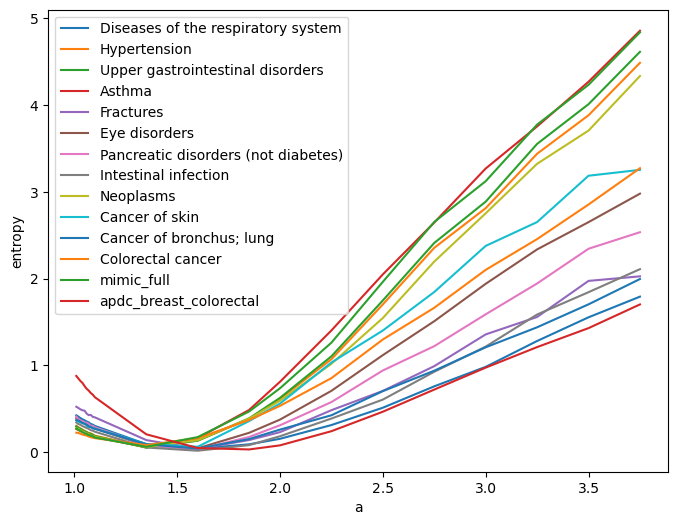

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

other_params = ['patients', 'states', 'bins']

plt.figure(figsize=(8,6))
zipf_df = full_df[full_df["syn_name"] == "zipf_shuffle"]
for ref_name in zipf_df.ref_name.unique():
    _df = zipf_df[zipf_df["ref_name"] == ref_name].sort_values("a", ascending=True).reset_index(drop=True)
    idx_best_entropy = _df["entropy"].idxmin()
    best_patients = _df.loc[idx_best_entropy, "patients"]
    best_states = _df.loc[idx_best_entropy, "states"]
    best_bins = _df.loc[idx_best_entropy, "bins"]
    _df = _df[(_df["patients"] == best_patients) & (_df["states"] == best_states) & (_df["bins"] == best_bins)]
    sns.lineplot(x="a", y="entropy", data=_df, label=ref_name)#, scatter_kws={"alpha": 0.5}, lowess=True)
plt.legend()
plt.savefig("thesis_figures/4/best_zipf_a.pdf", bbox_inches="tight")
plt.show()

In [20]:
df_perf = full_df.sort_values("entropy", ascending=True).groupby(["ref_name", "syn_name"]).first().reset_index()
results_df = []
for ds in ref_fs.keys():
    results_df.append({
        "dataset": ds,
        **{
            dist: df_perf[df_perf.ref_name == ds][df_perf.syn_name == dist]["entropy"].values[0]
            for dist in df_perf.syn_name.unique()
        }
    })
results_df.append({
    "dataset": "apdc_breast_colorectal",
    **{
        dist: df_perf[df_perf.ref_name == "apdc_breast_colorectal"][df_perf.syn_name == dist]["entropy"].values[0]
        for dist in df_perf.syn_name.unique()
    }
})
print(pd.DataFrame(results_df).to_latex(escape=False, index=False, column_format="lrrrr", float_format="%.3f"))

\begin{tabular}{lrrrr}
\toprule
                            dataset &  hotspot_shuffle &  normal &  uniform &  zipf_shuffle \\
\midrule
 Diseases of the respiratory system &            0.058 &   6.018 &    1.259 &         0.040 \\
                       Hypertension &            0.063 &   6.299 &    1.153 &         0.056 \\
   Upper gastrointestinal disorders &            0.045 &   6.427 &    1.161 &         0.052 \\
                             Asthma &            0.054 &   7.154 &    1.068 &         0.059 \\
                          Fractures &            0.071 &   5.320 &    1.197 &         0.037 \\
                      Eye disorders &            0.054 &   5.947 &    1.182 &         0.044 \\
Pancreatic disorders (not diabetes) &            0.075 &   3.602 &    1.482 &         0.030 \\
               Intestinal infection &            0.088 &   4.439 &    1.327 &         0.017 \\
                          Neoplasms &            0.046 &   7.368 &    1.069 &         0.060 \\
         

/tmp/ipykernel_265141/3128270967.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dist: df_perf[df_perf.ref_name == ds][df_perf.syn_name == dist]["entropy"].values[0]
/tmp/ipykernel_265141/3128270967.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dist: df_perf[df_perf.ref_name == "apdc_breast_colorectal"][df_perf.syn_name == dist]["entropy"].values[0]


In [1]:
# # Compute a correlation matrix between each ref_f using the entropy
# matrix = np.zeros((len(ref_fs.keys()), len(ref_fs.keys())))
# for a, ref_f_a in enumerate(ref_fs.values()):
#     for b, ref_f_b in enumerate(ref_fs.values()):
#         matrix[a, b] = get_entropy(ref_f_a["ref_f"], ref_f_b["ref_f"])

# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 120

# fig, ax = plt.subplots(figsize=(10, 10))
# sns.heatmap(matrix, ax=ax, cmap="Purples", square=True, cbar=False, annot=True, linewidth=.5, fmt=".2f", annot_kws={"fontsize": 8})
# ax.set_xticklabels(list(ref_fs.keys()), rotation=90)
# ax.set_yticklabels(list(ref_fs.keys()), rotation=0)
# # ax.set_title("Entropy between reference datasets")
# plt.tight_layout()
# plt.show()

# np.median(matrix), np.max(matrix)


NameError: name 'np' is not defined

In [9]:
# Keep the row with the minimum "entropy" for each "ref_name" and "syn_name"
df_perf = full_df.sort_values("entropy", ascending=True).groupby(["ref_name", "syn_name"]).first().reset_index()
df_perf = df_perf.rename(columns={"entropy": "accuracy", "ref_name": "dataset_name", "syn_name": "classifier_name"})
df_perf["accuracy"] *= -1
from critical_difference_diagram import wilcoxon_holm, graph_ranks
"""
Draws the critical difference diagram given the list of pairwise classifiers that are
significant or not
"""
alpha=0.05
p_values, average_ranks, _ = wilcoxon_holm(df_perf=df_perf, alpha=alpha)

print(average_ranks)

for p in p_values:
    print(p)


graph_ranks(average_ranks.values, average_ranks.keys(), p_values,
            cd=None, reverse=True, width=9, textspace=1.5, labels=False)

# font = {'family': 'sans-serif',
#     'color':  'black',
#     'weight': 'normal',
#     'size': 22,
#     }
from matplotlib import pyplot as plt
plt.show()
# if title:
#     plt.title(title,fontdict=font, y=0.9, x=0.5)
plt.savefig('thesis_figures/4/critical_difference_distributions.pdf', bbox_inches='tight')

['hotspot_shuffle' 'normal' 'uniform' 'zipf_shuffle']
hotspot_shuffle    5.0
normal             0.0
uniform            0.0
zipf_shuffle       9.0
dtype: float64
normal             3.928571
uniform            3.071429
hotspot_shuffle    1.642857
zipf_shuffle       1.357143
dtype: float64
('hotspot_shuffle', 'normal', 0.0001220703125, True)
('hotspot_shuffle', 'uniform', 0.0001220703125, True)
('normal', 'zipf_shuffle', 0.0001220703125, True)
('uniform', 'zipf_shuffle', 0.0001220703125, True)
('normal', 'uniform', 0.000244140625, True)
('hotspot_shuffle', 'zipf_shuffle', 0.118896484375, False)
Index(['normal', 'uniform', 'hotspot_shuffle', 'zipf_shuffle'], dtype='object')
[2, 3]


In [ ]:
from IPython.display import display

results = []
for ref_name in full_df["ref_name"].unique():
    ref_df = full_df[full_df["ref_name"] == ref_name].sort_values("entropy", ascending=True).reset_index(drop=True)
    # Determine the best rank, and the average rank of the top 20 results for each "syn_name" method
    for syn_name in ref_df["syn_name"].unique():
        syn_df = ref_df[ref_df["syn_name"] == syn_name]
        best_rank = syn_df.index[0]
        best_entropy = syn_df["entropy"].iloc[0]
        top_20_mean_rank = syn_df.index[:20].values.mean()
        top_20_mean_entropy = syn_df["entropy"].iloc[:20].values.mean()

        best_params = ""
        if syn_name == "zipf_shuffle":
            best_params = f"$a={syn_df['a'].iloc[0]}$"
        elif syn_name == "hotspot_shuffle":
            best_params = f"$H_l,H_f={syn_df['num_hotspot_bins'].iloc[0]:.0f}, {syn_df['hotspot_factor'].iloc[0]:.0f}$"
        elif syn_name == "normal":
            best_params = f"$\sigma={syn_df['scale'].iloc[0]}$"
        elif syn_name == "uniform":
            best_params = "n/a"

        ref_name_formatted = ""
        if ref_name == "mimic_full":
            ref_name_formatted = "MIMIC: full"
        elif ref_name == "mimic_cancer":
            ref_name_formatted = "MIMIC: cancer"
        elif ref_name == "mimic_respiratory":
            ref_name_formatted = "MIMIC: respiratory"
        elif ref_name == "mimic_breastcancer":
            ref_name_formatted = "MIMIC: breast cancer"
        elif ref_name == "apdc_breast_colorectal":
            ref_name_formatted = "NSW APDC"

        results.append({
            "Reference distribution": ref_name_formatted,
            "$P_X$": syn_name,
            "Best params": best_params,
            "Best rank": best_rank,
            "Top-20 mean rank": top_20_mean_rank,
            "Best KL divergence": best_entropy,
            "Top-20 mean KL divergence": top_20_mean_entropy,
        })

def format_dist_name(dist_name: str) -> str:
    if dist_name == "zipf_shuffle":
        return f"$\Zipf$"
    elif dist_name == "normal":
        return f"$\\Normal$"
    elif dist_name == "hotspot_shuffle":
        return f"$\Hotspot$"
    elif dist_name == "uniform":
        return f"$\\Uniform$"
    else:
        raise ValueError()


df = pd.DataFrame(results)
df["$P_X$"] = df["$P_X$"].apply(format_dist_name)
df["Best KL divergence"] = df["Best KL divergence"].round(3)
df["Top-20 mean KL divergence"] = df["Top-20 mean KL divergence"].round(3)
print(df.rename(columns={
    "Reference distribution": r"\thead{Reference distribution}",
    "$P_X$": r"\thead{$P_X$}",
    "Best rank": r"\thead{Best \\ rank}",
    "Top-20 mean rank": r"\thead{Top-20 \\ mean \\ rank}",
    "Best KL divergence": r"\thead{Best \\ KL.div.}",
    "Top-20 mean KL divergence": r"\thead{Top-20 \\ mean \\ KL.div.}"
}).to_latex(escape=False, index=False, column_format="lccrrrr", ))


In [25]:
from matplotlib import pyplot as plt

def hide(ax):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

fs = ref_fs
fs["apdc_breast_colorectal"] = {"ref_name": "apdc_breast_colorectal", "ref_f": apdc_f}

fig, axes = plt.subplots(5, 3, figsize=(9, 12))
for i, (ref_name, ref_dict) in enumerate(fs.items()):
    print(ref_name)
    _df = full_df[full_df["ref_name"] == ref_name]
    _df = _df.sort_values("entropy", ascending=True)
    ref_f = ref_dict["ref_f"]
    ax = axes.flatten()[i]
    ax.loglog(ref_f, label="Reference")
    for syn_name in np.sort(_df["syn_name"].unique()):
        syn_df = _df[_df["syn_name"] == syn_name]
        syn_f = syn_df["syn_f"].iloc[0]
        ax.loglog(syn_f, "--", label=syn_name)
    # Make the font size in the legend a bit smaller
    ax.legend(loc='lower left', prop={'size': 8})
    ax.set_title(ref_name)
    ax.set_xlabel("Rank")
    ax.set_ylabel("Frequency")
# don't draw the anything for the last ax in axes.flatten()
hide(axes.flatten()[-1])
plt.tight_layout()
plt.savefig("thesis_figures/4/reference-rank-frequency-plots-distributions.pdf", bbox_inches="tight")
plt.show()


Diseases of the respiratory system
Hypertension
Upper gastrointestinal disorders
Asthma
Fractures
Eye disorders
Pancreatic disorders (not diabetes)
Intestinal infection
Neoplasms
Cancer of skin
Cancer of bronchus; lung
Colorectal cancer
mimic_full
apdc_breast_colorectal


In [26]:
import numpy as np
import scipy.stats
import scipy.spatial
import pandas as pd


# mimic_fs = np.load("statistical_experiments/dataset_info.npz", allow_pickle=True)
ref_fs = np.load("statistical_experiments/new_dataset_info.npz", allow_pickle=True)["data"].item()
apdc_f = np.load("statistical_experiments/apdc_frequencies.npz")["f"]
apdc_f = apdc_f / apdc_f.sum()


def fix_lens(f1, f2):
    if len(f1) < len(f2):
        append_vals = np.zeros((len(f2) - len(f1))) + 1e-10
        f1 = np.append(f1, append_vals)

    if len(f2) < len(f1):
        append_vals = np.zeros((len(f1) - len(f2))) + 1e-10
        f2 = np.append(f2, append_vals)

    assert len(f2) == len(f1)
    return f1, f2

def get_entropy(syn_f, ref_f):
    _ref_f, _syn_f = fix_lens(ref_f, syn_f)
    P = _ref_f
    Q = _syn_f
    entropy = scipy.stats.entropy(P, Q)
    # Return the jensen shannon divergence
    # entropy = scipy.spatial.distance.jensenshannon(P, Q)

    return entropy



barabasi = pd.read_parquet("statistical_experiments/result_datasets/grid_search_results_zipf_shuffle_directed_extended_barabasi_albert_graph.parquet")
barabasi["syn_name"] = "barabasi_albert"
erdos = pd.read_parquet("statistical_experiments/result_datasets/grid_search_results_zipf_shuffle_gnp_random_graph.parquet")
erdos["syn_name"] = "erdos_renyi"
binomial = pd.read_parquet("statistical_experiments/result_datasets/grid_search_results_zipf_shuffle_binomial_tree.parquet")
binomial["syn_name"] = "binomial_tree"
full_df = pd.concat([barabasi, erdos, binomial], axis=0)

apdc_df = full_df[full_df["ref_name"] == "mimic_full"].copy()
apdc_df["ref_name"] = "apdc_breast_colorectal"
apdc_df["entropy"] = apdc_df["syn_f"].apply(lambda x: get_entropy(x, ref_f=apdc_f))


ref_dfs = []
for ref_name in ref_fs.keys():
    print(ref_name)
    ref_df = apdc_df.copy()
    ref_df["ref_name"] = ref_name
    ref_df["ref_num_bins"] = ref_fs[ref_name]["ref_num_bins"]
    ref_df["ref_num_patients"] = ref_fs[ref_name]["ref_num_patients"]
    ref_df["ref_num_events"] = ref_fs[ref_name]["ref_num_events"]
    ref_df["ref_avg_seq_len"] = ref_fs[ref_name]["ref_avg_seq_len"]
    ref_f = ref_fs[ref_name]["ref_f"]
    ref_df["entropy"] = ref_df["syn_f"].apply(lambda x: get_entropy(x, ref_f=ref_f))
    ref_dfs.append(ref_df)

full_df = pd.concat(ref_dfs + [apdc_df], axis=0)



Diseases of the respiratory system
Hypertension
Upper gastrointestinal disorders
Asthma
Fractures
Eye disorders
Pancreatic disorders (not diabetes)
Intestinal infection
Neoplasms
Cancer of skin
Cancer of bronchus; lung
Colorectal cancer
mimic_full


In [6]:
df_perf = full_df.sort_values("entropy", ascending=True).groupby(["ref_name", "syn_name"]).first().reset_index()
results_df = []
for ds in ref_fs.keys():
    results_df.append({
        "dataset": ds,
        **{
            dist: df_perf[df_perf.ref_name == ds][df_perf.syn_name == dist]["entropy"].values[0]
            for dist in df_perf.syn_name.unique()
        }
    })
results_df.append({
    "dataset": "apdc_breast_colorectal",
    **{
        dist: df_perf[df_perf.ref_name == "apdc_breast_colorectal"][df_perf.syn_name == dist]["entropy"].values[0]
        for dist in df_perf.syn_name.unique()
    }
})
print(pd.DataFrame(results_df).to_latex(escape=False, index=False, column_format="lrrrr", float_format="%.3f"))

\begin{tabular}{lrrrr}
\toprule
                            dataset &  barabasi_albert &  binomial_tree &  erdos_renyi \\
\midrule
 Diseases of the respiratory system &            0.021 &          0.077 &        0.044 \\
                       Hypertension &            0.021 &          0.103 &        0.024 \\
   Upper gastrointestinal disorders &            0.027 &          0.100 &        0.033 \\
                             Asthma &            0.035 &          0.140 &        0.035 \\
                          Fractures &            0.032 &          0.081 &        0.041 \\
                      Eye disorders &            0.033 &          0.094 &        0.038 \\
Pancreatic disorders (not diabetes) &            0.042 &          0.086 &        0.039 \\
               Intestinal infection &            0.046 &          0.071 &        0.063 \\
                          Neoplasms &            0.031 &          0.127 &        0.040 \\
                     Cancer of skin &            0.048 &   

/tmp/ipykernel_265141/3128270967.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dist: df_perf[df_perf.ref_name == ds][df_perf.syn_name == dist]["entropy"].values[0]
/tmp/ipykernel_265141/3128270967.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dist: df_perf[df_perf.ref_name == "apdc_breast_colorectal"][df_perf.syn_name == dist]["entropy"].values[0]


In [7]:
# Keep the row with the minimum "entropy" for each "ref_name" and "syn_name"
df_perf = full_df.sort_values("entropy", ascending=True).groupby(["ref_name", "syn_name"]).first().reset_index()
df_perf = df_perf.rename(columns={"entropy": "accuracy", "ref_name": "dataset_name", "syn_name": "classifier_name"})
df_perf["accuracy"] *= -1
from critical_difference_diagram import wilcoxon_holm, graph_ranks
"""
Draws the critical difference diagram given the list of pairwise classifiers that are
significant or not
"""
alpha=0.05
p_values, average_ranks, _ = wilcoxon_holm(df_perf=df_perf, alpha=alpha)

print(average_ranks)

for p in p_values:
    print(p)


graph_ranks(average_ranks.values, average_ranks.keys(), p_values,
            cd=None, reverse=True, width=9, textspace=1.5, labels=False)

# font = {'family': 'sans-serif',
#     'color':  'black',
#     'weight': 'normal',
#     'size': 22,
#     }
from matplotlib import pyplot as plt
plt.show()
# if title:
#     plt.title(title,fontdict=font, y=0.9, x=0.5)
plt.savefig('thesis_figures/4/critical_difference_graphs.pdf', bbox_inches='tight')

['barabasi_albert' 'binomial_tree' 'erdos_renyi']
barabasi_albert    10.0
binomial_tree       0.0
erdos_renyi         4.0
dtype: float64
binomial_tree      3.000000
erdos_renyi        1.714286
barabasi_albert    1.285714
dtype: float64
('barabasi_albert', 'binomial_tree', 0.0001220703125, True)
('binomial_tree', 'erdos_renyi', 0.0001220703125, True)
('barabasi_albert', 'erdos_renyi', 0.0166015625, True)
Index(['binomial_tree', 'erdos_renyi', 'barabasi_albert'], dtype='object')


In [27]:
from matplotlib import pyplot as plt

def hide(ax):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

fs = ref_fs
fs["apdc_breast_colorectal"] = {"ref_name": "apdc_breast_colorectal", "ref_f": apdc_f}

fig, axes = plt.subplots(5, 3, figsize=(9, 12))
for i, (ref_name, ref_dict) in enumerate(fs.items()):
    _df = full_df[full_df["ref_name"] == ref_name]
    _df = _df.sort_values("entropy", ascending=True)
    ref_f = ref_dict["ref_f"]
    ax = axes.flatten()[i]
    ax.loglog(ref_f, label="Reference")
    for syn_name in np.sort(_df["syn_name"].unique()):
        syn_df = _df[_df["syn_name"] == syn_name]
        syn_f = syn_df["syn_f"].iloc[0]
        ax.loglog(syn_f, "--", label=syn_name)
    # Make the font size in the legend a bit smaller
    ax.legend(loc='lower left', prop={'size': 8})
    ax.set_title(ref_name)
    ax.set_xlabel("Rank")
    ax.set_ylabel("Frequency")
# don't draw the anything for the last ax in axes.flatten()
hide(axes.flatten()[-1])
plt.tight_layout()
plt.savefig("thesis_figures/4/reference-rank-frequency-plots-graphs.pdf", bbox_inches="tight")
plt.show()


In [72]:
from scipy.stats import chisquare

mimic_fs = np.load("statistical_experiments/dataset_info.npz", allow_pickle=True)
apdc_f = np.load("statistical_experiments/apdc_frequencies.npz")["f"]

def get_entropy_pvalue_jsd(_A, _B):
    def fix_lens(f1, f2):
        if len(f1) < len(f2):
            append_vals = np.zeros((len(f2) - len(f1))) + 1e-10
            # print(append_vals)
            f1 = np.append(f1, append_vals)

        if len(f2) < len(f1):
            append_vals = np.zeros((len(f1) - len(f2))) + 1e-10
            # print(append_vals)
            f2 = np.append(f2, append_vals)

        assert len(f2) == len(f1)
        return f1, f2


    A, B = fix_lens(_A.copy(), _B.copy())
    entropy = scipy.stats.entropy(A, B)
    js_divergence = scipy.spatial.distance.jensenshannon(A, B)

    if A.sum() > B.sum():
        B += (A.sum() - B.sum()) / len(B)
    elif A.sum() < B.sum():
        A += (B.sum() - A.sum()) / len(A)

    p_value = scipy.stats.chisquare(A, B).pvalue

    return entropy, p_value, js_divergence

def get_entropy_pvalue_jsd_from_ref_name(ref_name, syn_f):
    if ref_name == "apdc_breast_colorectal":
        ref_f = apdc_f
    else:
        data = mimic_fs["data"].item()
        ref_f = data[ref_name]["ref_f"] * data[ref_name]["ref_num_events"]
    
    return get_entropy_pvalue_jsd(ref_f, syn_f)

def get_jensen_shannon_divergence(ref_name, syn_f):
    if ref_name == "apdc_breast_colorectal":
        ref_f = apdc_f
    else:
        data = mimic_fs["data"].item()
        ref_f = data[ref_name]["ref_f"] * data[ref_name]["ref_num_events"]
    
    A, B = fix_lens(ref_f, syn_f)

    return scipy.spatial.distance.jensenshannon(A, B)


full_df["p_value"] = full_df.apply(lambda x: get_entropy_pvalue_jsd_from_ref_name(x["ref_name"], x["syn_f"])[1], axis=1)
full_df["js_divergence"] = full_df.apply(lambda x: get_jensen_shannon_divergence(x["ref_name"], x["syn_f"]), axis=1)

In [77]:
full_df[full_df["ref_name"] == "mimic_breastcancer"].sort_values("js_divergence", ascending=True).reset_index(drop=True)

,ref_name,ref_num_bins,ref_num_patients,ref_num_events,ref_avg_seq_len,syn_name,syn_num_bins,syn_num_patients,syn_num_events,syn_avg_seq_len,...,bins,a,persistence_min,persistence_max,entropy,num_hotspot_bins,hotspot_factor,scale,p_value,js_divergence
0,mimic_breastcancer,1262,4670,21144,4.527623,hotspot_shuffle,1281,1000,12922,12.9220,...,2500,NaN,0.7,0.7,0.041876,10.0,10.0,NaN,0.0,0.102579
1,mimic_breastcancer,1262,4670,21144,4.527623,zipf_shuffle,998,2500,33001,13.2004,...,1000,1.35,0.7,0.7,0.178107,NaN,NaN,NaN,0.0,0.107271
2,mimic_breastcancer,1262,4670,21144,4.527623,hotspot_shuffle,1350,1000,13407,13.4070,...,2500,NaN,0.7,0.7,0.047944,10.0,10.0,NaN,0.0,0.111041
3,mimic_breastcancer,1262,4670,21144,4.527623,hotspot_shuffle,1000,2500,33001,13.2004,...,1000,NaN,0.7,0.7,0.182887,10.0,5.0,NaN,0.0,0.111727
4,mimic_breastcancer,1262,4670,21144,4.527623,zipf_shuffle,1000,5000,65334,13.0668,...,1000,1.35,0.7,0.7,0.181551,NaN,NaN,NaN,0.0,0.111981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,mimic_breastcancer,1262,4670,21144,4.527623,normal,2,2500,29446,11.7784,...,2500,NaN,0.7,0.7,15.660366,NaN,NaN,0.2,0.0,0.749687
16796,mimic_breastcancer,1262,4670,21144,4.527623,normal,2,2500,29446,11.7784,...,10000,NaN,0.7,0.7,15.660366,NaN,NaN,0.2,0.0,0.749687
16797,mimic_breastcancer,1262,4670,21144,4.527623,normal,2,2500,29446,11.7784,...,1000,NaN,0.7,0.7,15.660366,NaN,NaN,0.1,0.0,0.749687
16798,mimic_breastcancer,1262,4670,21144,4.527623,normal,2,2500,29446,11.7784,...,5000,NaN,0.7,0.7,15.660366,NaN,NaN,0.1,0.0,0.749687


100%|██████████| 100/100 [00:11<00:00,  8.45it/s]


entropy 0.01852735029390988
p_value: np.mean(p_values)=0.0, np.std(p_values)=0.0, np.max(p_values)=0.0, np.min(p_values)=0.0


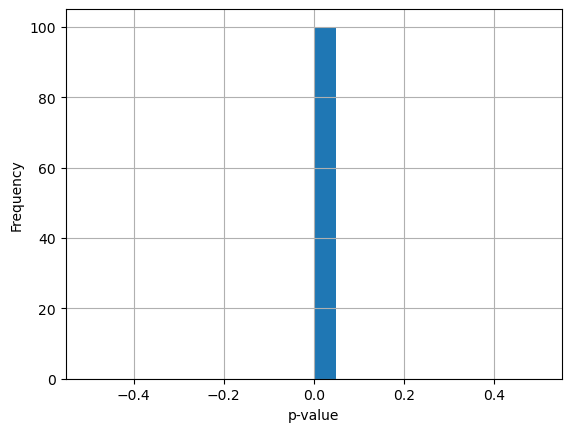

In [7]:
import pandas as pd
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt

from tqdm import tqdm

def get_entropy_pvalue_jsd(_A, _B):
    def fix_lens(f1, f2):
        if len(f1) < len(f2):
            append_vals = np.zeros((len(f2) - len(f1))) + 1e-10
            # print(append_vals)
            f1 = np.append(f1, append_vals)

        if len(f2) < len(f1):
            append_vals = np.zeros((len(f1) - len(f2))) + 1e-10
            # print(append_vals)
            f2 = np.append(f2, append_vals)

        assert len(f2) == len(f1)
        return f1, f2


    A, B = fix_lens(_A.copy(), _B.copy())
    entropy = scipy.stats.entropy(A, B)
    js_divergence = scipy.spatial.distance.jensenshannon(A, B)

    if A.sum() > B.sum():
        B += (A.sum() - B.sum()) / len(B)
    elif A.sum() < B.sum():
        A += (B.sum() - A.sum()) / len(A)

    p_value = scipy.stats.chisquare(A, B).pvalue

    return entropy, p_value, js_divergence


mimic = pd.read_parquet("mimic_feature_set.parquet")
# subject_ids = mimic[mimic.d_ccs_lv3 == "2.1.1"].subject_id.unique()
subject_ids = mimic[mimic.d_ccs_lv2 == "2.5"].subject_id.unique()
# subject_ids = mimic[mimic.d_ccs_lv1 == "2"].subject_id.unique()
# subject_ids = mimic[mimic.d_ccs_lv1 == "8"].subject_id.unique()
# subject_ids = mimic.subject_id.unique()

# split subject_ids into two random groups
entropys = []
p_values = []
js_divergences = []
for i in tqdm(range(100)):
    np.random.seed(i)
    np.random.shuffle(subject_ids)
    group_1 = subject_ids[:len(subject_ids) // 20]
    group_2 = subject_ids[len(subject_ids) // 20:]

    group_1_df = mimic[mimic.subject_id.isin(group_1)]
    group_2_df = mimic[mimic.subject_id.isin(group_2)]

    group_1_f = group_1_df[group_1_df.p_ccs_lv2 != ""].p_ccs_lv2.value_counts(normalize=False)
    group_2_f = group_2_df[group_2_df.p_ccs_lv2 != ""].p_ccs_lv2.value_counts(normalize=False)

    entropy, p_value, jsd = get_entropy_pvalue_jsd(group_1_f, group_2_f)
    entropys.append(entropy)
    p_values.append(p_value)
    js_divergences.append(jsd)


print("entropy", np.mean(entropys))
print(f"p_value: {np.mean(p_values)=}, {np.std(p_values)=}, {np.max(p_values)=}, {np.min(p_values)=}")

pd.Series(p_values).hist(bins=20)
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.savefig("thesis_figures/4/chi_square_p_value_breast_cancer_subset.pdf")
plt.show()

entropy: np.mean(entropys)=0.01852735029390988, np.std(entropys)=0.004198213545503091, np.max(entropys)=0.02945075287940602, np.min(entropys)=0.01066980399591685
js_divergence: np.mean(js_divergences)=0.07447361650244652, np.std(js_divergences)=0.008267032414287926, np.max(js_divergences)=0.0936559833574135, np.min(js_divergences)=0.05748228043877884


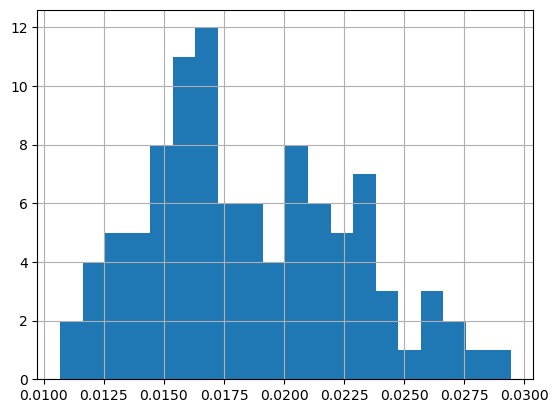

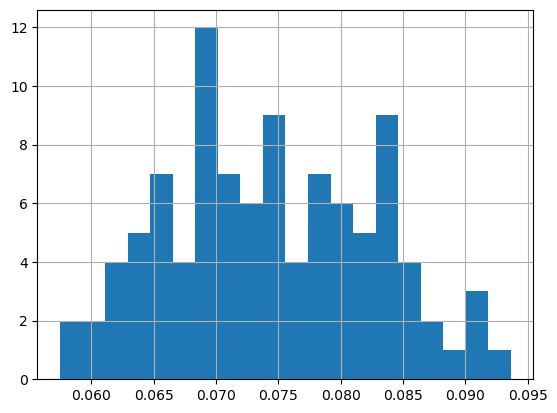

In [8]:
print(f"entropy: {np.mean(entropys)=}, {np.std(entropys)=}, {np.max(entropys)=}, {np.min(entropys)=}")
print(f"js_divergence: {np.mean(js_divergences)=}, {np.std(js_divergences)=}, {np.max(js_divergences)=}, {np.min(js_divergences)=}")
# full_df.where(full_df["ref_name"] == "mimic_breastcancer").dropna().sort_values("entropy", ascending=True).head(10)

pd.Series(entropys).hist(bins=20)
plt.show()
pd.Series(js_divergences).hist(bins=20)
plt.show()

In [52]:
mimic_fs = np.load("statistical_experiments/dataset_info.npz", allow_pickle=True)
apdc_f = np.load("statistical_experiments/apdc_frequencies.npz")["f"]

def get_entropy_and_pvalue_from_ref_name(ref_name, syn_f):
    if ref_name == "apdc_breast_colorectal":
        ref_f = apdc_f
    else:
        data = mimic_fs["data"].item()
        ref_f = data[ref_name]["ref_f"] * data[ref_name]["ref_num_events"]
    
    return get_entropy_and_pvalue(ref_f, syn_f)

def get_jensen_shannon_divergence(ref_name, syn_f):
    if ref_name == "apdc_breast_colorectal":
        ref_f = apdc_f
    else:
        data = mimic_fs["data"].item()
        ref_f = data[ref_name]["ref_f"] * data[ref_name]["ref_num_events"]
    
    A, B = fix_lens(ref_f, syn_f)

    return scipy.spatial.distance.jensenshannon(A, B)

# full_df["p_value"] = full_df.apply(lambda x: get_entropy_and_pvalue_from_ref_name(x["ref_name"], x["syn_f"])[1], axis=1)

full_df["js_divergence"] = full_df.apply(lambda x: get_jensen_shannon_divergence(x["ref_name"], x["syn_f"]), axis=1)

In [57]:
full_df.where(full_df["ref_name"] == "mimic_breastcancer").sort_values("js_divergence", ascending=True).head(10)

,ref_name,ref_num_bins,ref_num_patients,ref_num_events,ref_avg_seq_len,syn_name,syn_num_bins,syn_num_patients,syn_num_events,syn_avg_seq_len,...,bins,a,m,p,q,persistence_min,persistence_max,entropy,p_value,js_divergence
7946,mimic_breastcancer,1262.0,4670.0,21144.0,4.527623,barabasi,3080.0,5000.0,62416.0,12.4832,...,10000.0,1.81,2.0,0.00,0.0,0.7,0.7,0.126053,0.0,0.190747
8212,mimic_breastcancer,1262.0,4670.0,21144.0,4.527623,barabasi,3007.0,5000.0,62416.0,12.4832,...,10000.0,1.81,6.0,0.80,0.0,0.7,0.7,0.127036,0.0,0.191294
8513,mimic_breastcancer,1262.0,4670.0,21144.0,4.527623,barabasi,3098.0,5000.0,62416.0,12.4832,...,10000.0,1.81,4.0,0.00,0.4,0.7,0.7,0.128260,0.0,0.192322
8563,mimic_breastcancer,1262.0,4670.0,21144.0,4.527623,barabasi,3070.0,5000.0,62416.0,12.4832,...,10000.0,1.81,6.0,0.40,0.2,0.7,0.7,0.128459,0.0,0.192392
8577,mimic_breastcancer,1262.0,4670.0,21144.0,4.527623,barabasi,3079.0,5000.0,62416.0,12.4832,...,10000.0,1.81,0.0,0.40,0.6,0.7,0.7,0.128524,0.0,0.192545
9811,mimic_breastcancer,1262.0,4670.0,21144.0,4.527623,barabasi,2850.0,5000.0,65066.0,13.0132,...,10000.0,1.81,8.0,0.00,0.4,0.7,0.7,0.133674,0.0,0.192558
8601,mimic_breastcancer,1262.0,4670.0,21144.0,4.527623,barabasi,3106.0,5000.0,62416.0,12.4832,...,10000.0,1.81,6.0,0.00,0.2,0.7,0.7,0.128653,0.0,0.192695
8615,mimic_breastcancer,1262.0,4670.0,21144.0,4.527623,erdos,3106.0,5000.0,62416.0,12.4832,...,10000.0,1.81,NaN,0.84,NaN,0.7,0.7,0.128699,0.0,0.192698
8642,mimic_breastcancer,1262.0,4670.0,21144.0,4.527623,erdos,3112.0,5000.0,62416.0,12.4832,...,10000.0,1.81,NaN,0.20,NaN,0.7,0.7,0.128800,0.0,0.192929
8817,mimic_breastcancer,1262.0,4670.0,21144.0,4.527623,barabasi,3108.0,5000.0,62416.0,12.4832,...,10000.0,1.81,2.0,0.60,0.4,0.7,0.7,0.129669,0.0,0.193085


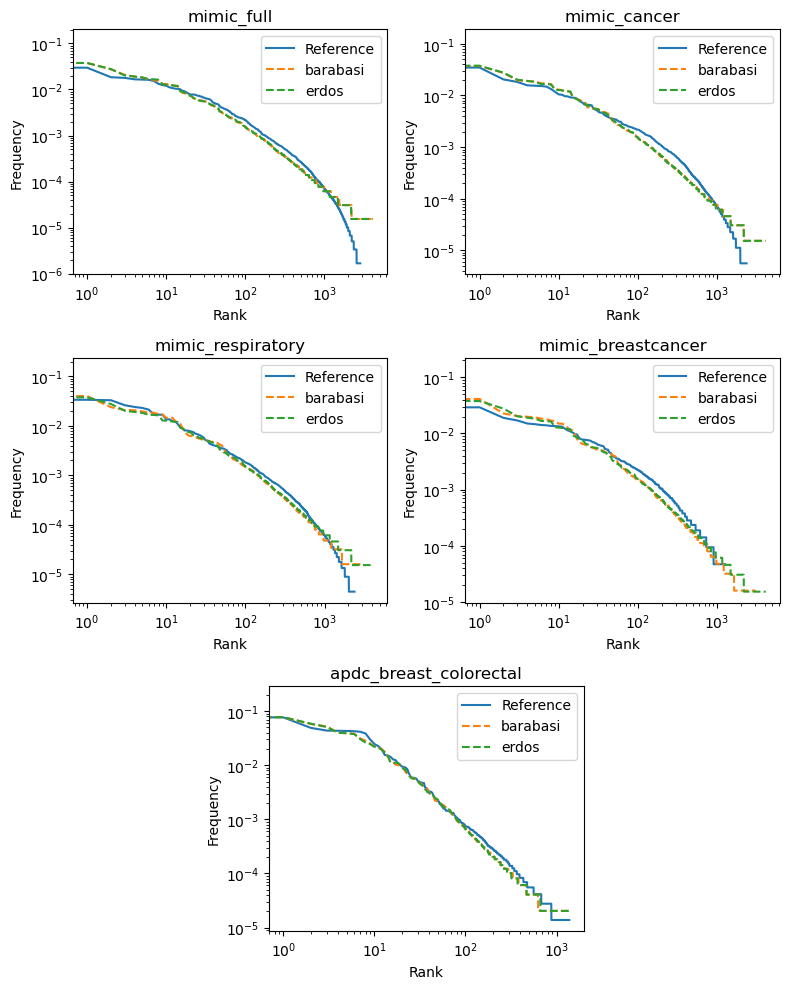

In [14]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec


fs = mimic_fs["data"].item()
fs["apdc_breast_colorectal"] = {"ref_name": "apdc_breast_colorectal", "ref_f": apdc_f}

plt.figure(figsize=(8, 10))
gs = gridspec.GridSpec(3, 4)

for i, ref_name in enumerate(full_df.ref_name.unique()):
    df = full_df[full_df["ref_name"] == ref_name]
    df = df.sort_values("entropy", ascending=True)
    ref_f = fs[ref_name]["ref_f"]
    if i == 0:
        ax = plt.subplot(gs[0, 0:2])
    elif i == 1:
        ax = plt.subplot(gs[0, 2:4])
    elif i == 2:
        ax = plt.subplot(gs[1, 0:2])
    elif i == 3:
        ax = plt.subplot(gs[1, 2:4])
    elif i == 4:
        ax = plt.subplot(gs[2, 1:3])
    ax.loglog(ref_f, label="Reference")
    for syn_name in np.sort(df["syn_name"].unique()):
        syn_df = df[df["syn_name"] == syn_name]
        syn_f = syn_df["syn_f"].iloc[0]
        ax.loglog(syn_f, "--", label=syn_name)
    ax.legend()
    ax.set_title(ref_name)
    ax.set_xlabel("Rank")
    ax.set_ylabel("Frequency")
plt.tight_layout()
# plt.savefig("thesis_figures/4/reference-rank-frequency-plots.pdf")


/opt/conda/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

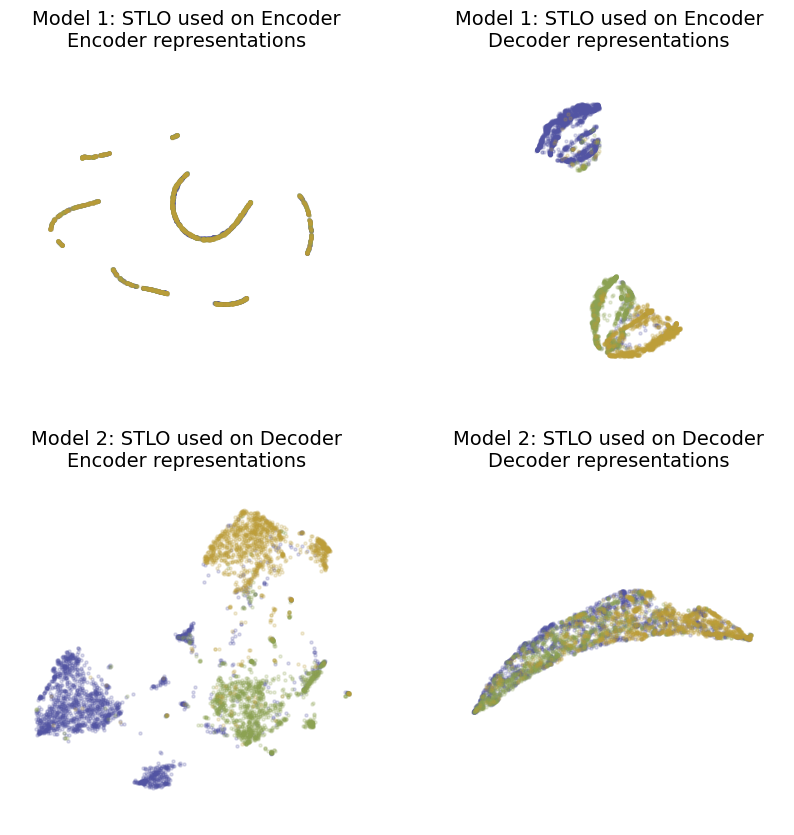

In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from image_processor import _plot_encodings, hide

experiment_encoder = Path("/workspaces/defrag/paper_experiments/mse_stlo_enc_dec_experiment/synthetic_data_loss_on_encoder/experiment_be2e421")
experiment_decoder = Path("/workspaces/defrag/paper_experiments/mse_stlo_enc_dec_experiment/synthetic_data_loss_on_decoder/experiment_be2e421")

# 2 cols, 1 row
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# Plot Encoder representations
archive = np.load(experiment_encoder / "final_representations.npz", allow_pickle=True)
_plot_encodings(archive["embeddings"], pd.Series(archive["targets"]), axs[0][0])
_plot_encodings(archive["decodings_embeddings"], pd.Series(archive["targets"]), axs[0][1])
# Plot Decoder representations
archive = np.load(experiment_decoder / "final_representations.npz", allow_pickle=True)
_plot_encodings(archive["embeddings"], pd.Series(archive["targets"]), axs[1][0])
_plot_encodings(archive["decodings_embeddings"], pd.Series(archive["targets"]), axs[1][1])
# Hide axes
hide(axs[0][0])
hide(axs[0][1])
hide(axs[1][0])
hide(axs[1][1])
# Set axes tiles, and set the font sizes to be equal
axs[0][0].set_title("Model 1: STLO used on Encoder\nEncoder representations", fontsize=14)
axs[0][1].set_title("Model 1: STLO used on Encoder\nDecoder representations", fontsize=14)
axs[1][0].set_title("Model 2: STLO used on Decoder\nEncoder representations", fontsize=14)
axs[1][1].set_title("Model 2: STLO used on Decoder\nDecoder representations", fontsize=14)
plt.savefig("thesis_figures/5/encoder_decoder_representations.pdf", bbox_inches="tight")
plt.show()


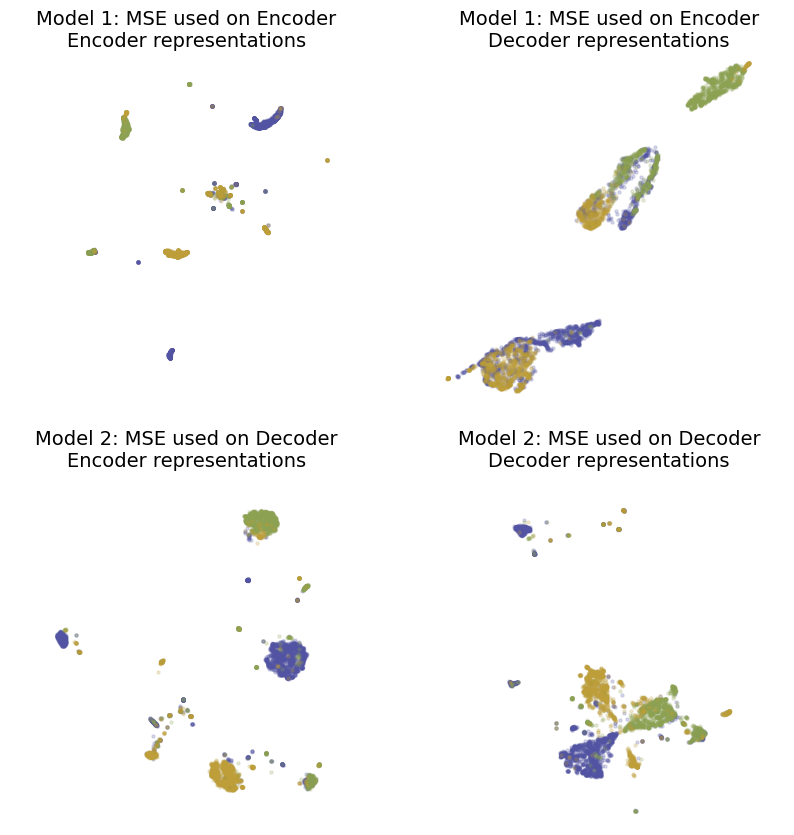

In [4]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from image_processor import _plot_encodings, hide

experiment_encoder = Path("/workspaces/defrag/paper_experiments/mse_stlo_enc_dec_experiment/synthetic_data_loss_on_encoder_mse/experiment_be2e421")
experiment_decoder = Path("/workspaces/defrag/paper_experiments/mse_stlo_enc_dec_experiment/synthetic_data_loss_on_decoder_mse/experiment_be2e421")

# 2 cols, 1 row
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# Plot Encoder representations
archive = np.load(experiment_encoder / "final_representations.npz", allow_pickle=True)
_plot_encodings(archive["embeddings"], pd.Series(archive["targets"]), axs[0][0])
_plot_encodings(archive["decodings_embeddings"], pd.Series(archive["targets"]), axs[0][1])
# Plot Decoder representations
archive = np.load(experiment_decoder / "final_representations.npz", allow_pickle=True)
_plot_encodings(archive["embeddings"], pd.Series(archive["targets"]), axs[1][0])
_plot_encodings(archive["decodings_embeddings"], pd.Series(archive["targets"]), axs[1][1])
# Hide axes
hide(axs[0][0])
hide(axs[0][1])
hide(axs[1][0])
hide(axs[1][1])
# Set axes tiles, and set the font sizes to be equal
axs[0][0].set_title("Model 1: MSE used on Encoder\nEncoder representations", fontsize=14)
axs[0][1].set_title("Model 1: MSE used on Encoder\nDecoder representations", fontsize=14)
axs[1][0].set_title("Model 2: MSE used on Decoder\nEncoder representations", fontsize=14)
axs[1][1].set_title("Model 2: MSE used on Decoder\nDecoder representations", fontsize=14)
plt.savefig("thesis_figures/5/encoder_decoder_mse_representations.pdf", bbox_inches="tight")
plt.show()


In [2]:
# Load lda results
from pathlib import Path
from plot import thesis_figure_formatting, thesis_figure_save

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from plot import cmap12


def melt_df(df):
    # melt the df
    df = pd.melt(
        df, 
        id_vars=["experiment_name", "seed", "zipf_a", "states", "variables", "bins", "n_topics", "steps"], 
        var_name="var",
        value_name="value"
    )
    # split the 'var' column into method, ami and score
    df[["method", "measure"]] = df["var"].str.split("_", n=1, expand=True)
    df = df.drop("var", axis=1)
    df = df.pivot_table(index=["experiment_name", "seed", "zipf_a", "states", "variables", "bins", "n_topics", "steps", "method"], columns="measure", values="value").reset_index()
    # convert data types
    df["is_isomorphic"] = df["is_isomorphic"].astype(bool)
    df["syn_contains_inf"] = df["syn_contains_inf"].astype(bool)
    df["inf_contains_syn"] = df["inf_contains_syn"].astype(bool)
    df["approx_ged"] = df["approx_ged"].astype(bool)
    # Fix edit distance of null
    df["edit_distance"] = df.apply(lambda x: 0 if pd.isna(x["edit_distance"]) and x["is_isomorphic"] else x["edit_distance"], axis=1)

    return df

def plot_lda_results(df, save_path: str = None):
    # df = df[df.variables == 1]
    # print types for each column in the df
    df['variables'] = df.variables.astype('category')
    df['bins'] = df.bins.astype('category')
    df['states'] = df.states.astype('category')
    df['zipf_a'] = df.zipf_a.astype('category')
    df['method'] = df['method'].apply(lambda x: "W2V+Cluster" if x == "Word2Vec" else x)
    df['method'] = df['method'].apply(lambda x: "PCA+Cluster" if x == "PCA+Cluster" else x)
    df['method'] = df['method'].apply(lambda x: "NNMF" if x == "Non-NegativeMatrixFactorization" else x)
    df['method'] = df['method'].apply(lambda x: "LDA" if x == "LatentDirichletAllocation" else x)
    # Add a bit of jitter
    df['GED-norm'] = np.clip(
        df["GED-norm"] + np.random.uniform(-0.5, 0.5, df["GED-norm"].__len__()), 
        0,
        df["GED-norm"].max() + 1
    )
    df['wlgk'] = np.clip(
        df.wlgk + np.random.uniform(-0.1, 0.1, df.wlgk.__len__()), 
        df.wlgk.min(),
        df.wlgk.max()
    )

    fig, axs = plt.subplots(
        4, 
        3, 
        figsize=(14, 9),
        # figsize=(8, 5),
        gridspec_kw={'height_ratios':[1, 1, .48, .48]}
    )#, sharey='row', )
    y_cols = ["states", "zipf_a", "variables", "bins"]
    for y_col, ax in zip(y_cols, axs):
        sns.boxplot(data=df, x="ami", y=y_col, hue="method", ax=ax[0], palette=cmap12)
        ax[0].legend().set_visible(False)
        ax[0].set(xlabel=None)

        sns.boxplot(data=df, x="GED-norm", y=y_col, hue="method", ax=ax[1], palette=cmap12)
        # Set x ticks at 0, 2, 4, 6, 8, 10, 12, 14, 16, 18
        # ax[1].set_xticks(np.arange(0, 20, 2))
        ax[1].set_xticks(np.arange(0, 3, 0.5))  # For edit_distance_nrom
        # Set minor ticks for every integer
        ax[1].xaxis.set_minor_locator(plt.MultipleLocator(1))
        ax[1].legend().set_visible(False)
        ax[1].set(xlabel=None)

        sns.boxplot(data=df, x="wlgk", y=y_col, hue="method", ax=ax[2], palette=cmap12)
        # Set x ticks at 0, 2, 4, 6, 8, 10, 12, 14, 16, 18
        ax[2].set_xticks(np.arange(0.0, 1.2, 0.2))
        # Set minor ticks for every integer
        ax[2].xaxis.set_minor_locator(plt.MultipleLocator(1))
        ax[2].legend().set_visible(False)
        ax[2].set(xlabel=None)

    axs[-1, 0].get_xaxis().set_visible(True)
    axs[-1, 1].get_xaxis().set_visible(True)
    axs[-1, 0].set_xlabel('AMI (higher=better)')
    axs[-1, 1].set_xlabel('GED-norm (lower=better)')
    axs[-1, 2].set_xlabel('WLGK (higher=better)')
    axs[0, 1].legend().set_visible(True)
    return None

# ----

def get_and_rename_defrag(experiment):
    df = pd.read_csv(experiment["path"])
    df = melt_df(df)
    df = df[df["method"] == "Defrag"]
    assert df.method.unique().__len__() == 1
    df["method"] = experiment["name"]
    return df

def get_non_defrag(experiment):
    df = pd.read_csv(experiment["path"])
    df = melt_df(df)
    df = df[df["method"] != "Defrag"]
    return df

def get_random(experiment):
    df = pd.read_csv(experiment["path"])
    df = melt_df(df)
    df = df[df["method"] == "Random"]
    return df

experiments = [
    # This one goes first
    {"path": Path("/workspaces/defrag/paper_experiments/defrag_thesis_experiments/synthetic_data_thesis_stlo_rpe_hdbscan") / "lda_results_wlgk_2.csv", "name": "Defrag[stlo,hdbscan,rpe]"},
    # Clustering ablation
    {"path": Path("/workspaces/defrag/paper_experiments/defrag_thesis_experiments/synthetic_data_thesis_stlo_rpe_hierarchical") / "lda_results_wlgk_2.csv", "name": "Defrag[stlo,hierarchical,rpe]"},
    {"path": Path("/workspaces/defrag/paper_experiments/defrag_thesis_experiments/synthetic_data_thesis_stlo_rpe_kmeans") / "lda_results_wlgk_2.csv", "name": "Defrag[stlo,kmeans,rpe]"},
    # Loss fn ablation
    {"path": Path("/workspaces/defrag/paper_experiments/defrag_thesis_experiments/synthetic_data_thesis_mse_rpe_hdbscan") / "lda_results_wlgk_2.csv", "name": "Defrag[mse,hdbscan,rpe]"},
    {"path": Path("/workspaces/defrag/paper_experiments/defrag_thesis_experiments/synthetic_data_thesis_barlow_rpe_hdbscan") / "lda_results_wlgk_2.csv", "name": "Defrag[barlow,hdbscan,rpe]"},
    {"path": Path("/workspaces/defrag/paper_experiments/defrag_thesis_experiments/synthetic_data_thesis_simcse_rpe_hdbscan") / "lda_results_wlgk_2.csv", "name": "Defrag[simcse,hdbscan,rpe]"},
    # Pos encoding ablation
    {"path": Path("/workspaces/defrag/paper_experiments/defrag_thesis_experiments/synthetic_data_thesis_stlo_ape_hdbscan") / "lda_results_wlgk_2.csv", "name": "Defrag[stlo,hdbscan,ape]"},
    {"path": Path("/workspaces/defrag/paper_experiments/defrag_thesis_experiments/synthetic_data_thesis_stlo_npe_hdbscan") / "lda_results_wlgk_2.csv", "name": "Defrag[stlo,hdbscan,npe]"},
    # STLO ablation
    {"path": Path("/workspaces/defrag/paper_experiments/defrag_thesis_experiments/synthetic_data_thesis_stlo_rpe_only_clo_hdbscan") / "lda_results_wlgk_2.csv", "name": "Defrag[stlo,hdbscan,rpe,only_clo]"},
    {"path": Path("/workspaces/defrag/paper_experiments/defrag_thesis_experiments/synthetic_data_thesis_stlo_rpe_only_sep_hdbscan") / "lda_results_wlgk_2.csv", "name": "Defrag[stlo,hdbscan,rpe,only_sep]"},
    {"path": Path("/workspaces/defrag/paper_experiments/defrag_thesis_experiments/synthetic_data_thesis_stlo_rpe_only_con_hdbscan") / "lda_results_wlgk_2.csv", "name": "Defrag[stlo,hdbscan,rpe,only_con]"},
    # And random goes last
    {"path": Path("/workspaces/defrag/paper_experiments/defrag_thesis_experiments/synthetic_data_thesis_stlo_rpe_hdbscan") / "lda_results_wlgk_2_random.csv", "name": "Random"},
]

df = pd.concat([get_and_rename_defrag(experiment) for experiment in experiments[:-1]] + [get_non_defrag(experiments[0])] + [get_random(experiments[-1])], axis=0)
# df = pd.concat([get_and_rename_defrag(experiment) for experiment in experiments] + [get_non_defrag(experiments[0])], axis=0)
# Calculate the mean of the "wlgk" column aggregated by the "method", and then sort "method" in
# descending order of the aggregated mean
method_mean_wlgk = df[["method", "wlgk"]].groupby(["method"]).mean().sort_values("wlgk", ascending=False)["wlgk"]
df = df.sort_values("method", key=lambda x: x.map(method_mean_wlgk), ascending=False)
df["GED-norm"] = df.edit_distance / df.states.astype(float)
del df["edit_distance"]
assert "edit_distance" not in df.columns
LAYOUT = "tall"
# LAYOUT = "tall"
thesis_figure_formatting()

# plot_lda_results(df)
# plt.tight_layout()
# plt.savefig("paper_figures/defrag_synthetic_benchmarks.pdf")

defrag_only_df = df[df.method == "Defrag[stlo,hdbscan,rpe]"]
defrag_only_df.method = "Defrag"
plot_lda_results(defrag_only_df)
plt.tight_layout()
plt.savefig("thesis_figures/6/defrag_sensitivity_analysis.pdf", bbox_inches="tight")
plt.show()


/opt/conda/lib/python3.10/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/tmp/ipykernel_2986413/3537507530.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['variables'] = df.variables.astype('category')
/tmp/ipykernel_2986413/3537507530.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [2]:
# Calculate the correlation between AMI and GED, and AMI and WLGK

ami_ged_corr = pd.DataFrame({"ami": df.ami, "edit_distance_norm": df.edit_distance / df.states.astype(float)}).corr().iloc[0, 1]
ami_wlgk_corr = df[["ami", "wlgk"]].corr().iloc[0, 1]

print(f"AMI-GED correlation: {ami_ged_corr}")
print(f"AMI-WLGK correlation: {ami_wlgk_corr}")


AttributeError: 'DataFrame' object has no attribute 'edit_distance'

In [3]:
# models = ["Defrag[stlo,hdbscan,rpe]","Defrag[stlo,hdbscan,rpe,only_clo]","Defrag[stlo,hdbscan,rpe,only_sep]","Defrag[stlo,hdbscan,rpe,only_con]"]
# tmp_df = df[df.method.isin(models)]

# tmp_df = tmp_df[tmp_df.experiment_name.isin((tmp_df.experiment_name.value_counts()[tmp_df.experiment_name.value_counts() == 4]).index)]
df[["method", "ami", "wlgk", "GED-norm"]].groupby("method").agg("mean").sort_values(["wlgk"], ascending=False)

measure,ami,wlgk,GED-norm
method,,,
"Defrag[stlo,hdbscan,rpe,only_clo]",0.739339,0.822581,0.117229
"Defrag[stlo,hdbscan,rpe]",0.701502,0.795348,0.143188
"Defrag[stlo,hdbscan,rpe,only_sep]",0.684316,0.772796,0.149041
"Defrag[stlo,hdbscan,rpe,only_con]",0.642334,0.740791,0.291683
"Defrag[simcse,hdbscan,rpe]",0.594429,0.736410,0.182804
"Defrag[stlo,hdbscan,npe]",0.696907,0.712038,0.239616
"Defrag[mse,hdbscan,rpe]",0.499613,0.661247,0.285268
"Defrag[barlow,hdbscan,rpe]",0.478106,0.566005,0.361210
"Defrag[stlo,kmeans,rpe]",0.510223,0.476197,0.384854


In [4]:
# Tables and results for chapter 6

from IPython.display import display
from critical_difference_diagram import wilcoxon_holm, graph_ranks
from matplotlib import pyplot as plt

CD_PATH_SCHEMA = "thesis_figures/6/cdd_{exp_name}_{metric}.pdf"
TABLE_PATH_SCHEMA = "thesis_figures/6/table_{exp_name}.tex"

def generate_cdd(df: pd.DataFrame, accuracy_col: str, dataset_col: str, classifier_col: str, save_path: str, higher_is_better: bool = True):
    """
    Draws the critical difference diagram given the list of pairwise classifiers that are
    significant or not
    """
    alpha=0.05
    df = df.rename(columns={accuracy_col: "accuracy", dataset_col: "dataset_name", classifier_col: "classifier_name"})
    if not higher_is_better:
        df["accuracy"] *= -1
    p_values, average_ranks, _ = wilcoxon_holm(df_perf=df, alpha=alpha)
    graph_ranks(average_ranks.values, average_ranks.keys(), p_values,cd=None, reverse=True, width=9, textspace=1.5, labels=False)
    plt.savefig(save_path, bbox_inches='tight')
    plt.clf()

def mean_summarise(scores):
    scores = pd.Series(scores)
    # Return the median and the 95% confidence interval, all to 2dp
    return f"${abs(scores.mean()):.2f}$ (${scores.std():.2f}$)" #[{scores.quantile(0.25):.2f}, {scores.quantile(0.75):.2f}]"
    # return f"{scores.mean():.2f} (±{scores.std():.2f})"

def median_summarise(scores):
    scores = pd.Series(scores)
    # Return the median and the 95% confidence interval, all to 2dp
    return f"${abs(scores.median()):.2f}$ (${scores.std():.2f}$)" #[{scores.quantile(0.25):.2f}, {scores.quantile(0.75):.2f}]"
    # return f"{scores.median():.2f} (±{scores.mad():.2f})"

def adjust_table(table_str):
    # (1) Move the 'Random' row to the bottom of the table
    # Find the line that begins with the string "Random"
    import re
    random_line = re.search(r"Random.*", table_str).group(0)
    # Remove the line from the table, including the newline character
    table_str = table_str.replace(random_line + "\n", "")
    # Prepend the line with the string "\n\midrule"
    random_line = "\midrule\n" + random_line
    # Insert the line at a above the line that begins "\bottomrule"
    table_str = table_str.replace(r"\bottomrule", random_line + "\n\\bottomrule")
    # (2) Replace "Defrag" with "\Defrag"
    table_str = table_str.replace(r"Defrag", r"\Defrag")
    # (3) Replace "method" with "Method"
    table_str = table_str.replace(r"method", r"Method")

    return table_str

def generate_results(df, methods, method_labels, exp_name):
    assert len(methods) == len(method_labels)
    _df = df.copy()
    _df = _df[_df["method"].isin(methods)]
    _df["method"] = _df["method"].apply(lambda x: method_labels[methods.index(x)])
    # Summarise the mean and standard deviation for the  ami, edit_distance, and wlgk of each method
    agg_dict = {'ami': mean_summarise, 'GED-norm': mean_summarise, 'wlgk': mean_summarise,}
    col_rename_dict = {"ami": "AMI", "GED-norm": "GED-norm", "wlgk": "WLGK"}
    table = _df[["method", "ami", "GED-norm", "wlgk"]].groupby("method").agg(agg_dict)
    table = table.sort_values("wlgk", ascending=False)
    table = table.rename(columns=col_rename_dict)
    table = table.reset_index()

    # with open(TABLE_PATH_SCHEMA.format(exp_name=exp_name), "w") as f:
    #     table_str = table.to_latex(escape=False, index=False, column_format="lrrr")
    #     f.write(adjust_table(table_str))

    generate_cdd(_df, accuracy_col="ami", dataset_col="experiment_name", classifier_col="method", save_path=CD_PATH_SCHEMA.format(metric="ami", exp_name=exp_name), higher_is_better=True)
    generate_cdd(_df, accuracy_col="GED-norm", dataset_col="experiment_name", classifier_col="method", save_path=CD_PATH_SCHEMA.format(metric="edit_distance", exp_name=exp_name), higher_is_better=False)
    generate_cdd(_df, accuracy_col="wlgk", dataset_col="experiment_name", classifier_col="method", save_path=CD_PATH_SCHEMA.format(metric="wlgk", exp_name=exp_name), higher_is_better=True)
    return table

def generate_figure(df, methods, method_labels, exp_name):
    assert len(methods) == len(method_labels)
    _df = df.copy()
    _df = _df[_df["method"].isin(methods)]
    _df["method"] = _df["method"].apply(lambda x: method_labels[methods.index(x)])
    import seaborn as sns
    # Make a horizontal bar chart of the mean AMI, edit_distance, and wlgk of each method

    fig, axs = plt.subplots(3, 1, figsize=(8, 5))
    sns.barplot(data=_df, x="ami", y="method", ax=axs[0], palette=cmap12)
    sns.barplot(data=_df, x="GED-norm", y="method", ax=axs[1], palette=cmap12)
    sns.barplot(data=_df, x="wlgk", y="method", ax=axs[2], palette=cmap12)
    axs[0].set_xlabel("Adjusted Mutual Information (higher=better)")
    axs[1].set_xlabel("Graph Edit Distance (normalised, lower=better)")
    axs[2].set_xlabel("Weisfeiler-Lehman Graph Kernel (higher=better)")

    # make sure all x axes start at 0
    axs[0].set_xlim(0, None)
    axs[1].set_xlim(0, None)
    axs[2].set_xlim(0, None)

    plt.tight_layout()
    plt.savefig(f"thesis_figures/6/figure_{exp_name}.pdf")
    plt.show()


# Table 1: Loss function ablation
methods = ["Defrag[stlo,hdbscan,rpe]", "Defrag[mse,hdbscan,rpe]", "Defrag[barlow,hdbscan,rpe]", "Defrag[simcse,hdbscan,rpe]", "Random"]
method_labels = ["Defrag + STLO", "Defrag + MSE", "Defrag + Barlow Twins", "Defrag + SimCSE", "Random"]
table = generate_results(df, methods, method_labels, "lossfn")
print("Table 1: Loss function ablation")
display(table)
generate_figure(df, methods, method_labels, "lossfn")

# Table 3: Positional encoding ablation
methods = ["Defrag[stlo,hdbscan,rpe]", "Defrag[stlo,hdbscan,ape]", "Defrag[stlo,hdbscan,npe]", "Random"]
method_labels = ["Defrag + RPE", "Defrag + APE", "Defrag + NPE", "Random"]
table = generate_results(df[df.experiment_name.isin(df[df.method == "Defrag[stlo,hdbscan,npe]"].experiment_name)], methods, method_labels, "posenc")
print("Table 2: Positional encoding ablation")
display(table)
generate_figure(df, methods, method_labels, "posenc")

# Table 2: Clustering algorithm ablation
methods = ["Defrag[stlo,hdbscan,rpe]", "Defrag[stlo,hierarchical,rpe]", "Defrag[stlo,kmeans,rpe]", "Random"]
method_labels = ["Defrag + HDBSCAN", "Defrag + Hierarchical", "Defrag + K-means", "Random"]
table = generate_results(df, methods, method_labels, "clustering")
print("Table 3: Clustering ablation")
display(table)
generate_figure(df, methods, method_labels, "clustering")

# Table 4: Attention mask ablation

# Table 5: Benchmarks
methods = ["Defrag[stlo,hdbscan,rpe]", "GHMM", "Word2Vec", "PCA+Cluster", "LatentDirichletAllocation", "Non-NegativeMatrixFactorization", "Random"]
method_labels = ["Defrag", "GHMM", "W2V+Cluster", "PCA+Cluster", "LDA", "NNMF", "Random"]
table = generate_results(df, methods, method_labels, "benchmarks")
print("Table 4: Benchmarks")
display(table)
generate_figure(df, methods, method_labels, "benchmarks")
print()

# Table 5: Benchmarks
methods = ["GHMM", "Word2Vec", "PCA+Cluster", "LatentDirichletAllocation", "Non-NegativeMatrixFactorization", "Random"]
method_labels = ["GHMM", "W2V+Cluster", "PCA+Cluster", "LDA", "NNMF", "Random"]
table = generate_results(df, methods, method_labels, "benchmarks")
print("Table 4: Benchmarks")
display(table)
generate_figure(df, methods, method_labels, "benchmarks_no_defrag")
print()


methods = ["Defrag[stlo,hdbscan,rpe]", "Defrag[stlo,hdbscan,rpe,only_clo]", "Defrag[stlo,hdbscan,rpe,only_sep]", "Defrag[stlo,hdbscan,rpe,only_con]", "Random"]
method_labels = ["Defrag (STLO)", "Defrag (Only clo)", "Defrag (Only sep)", "Defrag (Only con)", "Random"]
table = generate_results(df, methods, method_labels, "stlo_components")
print("Table -1: STLO Components")
display(table)
print()

Table 1: Loss function ablation


measure,method,AMI,GED-norm,WLGK
0,Defrag + STLO,$0.70$ ($0.26$),$0.14$ ($0.28$),$0.80$ ($0.29$)
1,Defrag + SimCSE,$0.59$ ($0.23$),$0.18$ ($0.27$),$0.74$ ($0.31$)
2,Defrag + MSE,$0.50$ ($0.27$),$0.29$ ($0.36$),$0.66$ ($0.35$)
3,Defrag + Barlow Twins,$0.48$ ($0.24$),$0.36$ ($0.43$),$0.57$ ($0.37$)
4,Random,$0.00$ ($0.00$),$1.16$ ($0.59$),$0.12$ ($0.14$)


Table 2: Positional encoding ablation


measure,method,AMI,GED-norm,WLGK
0,Defrag + RPE,$0.70$ ($0.26$),$0.14$ ($0.28$),$0.80$ ($0.29$)
1,Defrag + NPE,$0.70$ ($0.23$),$0.24$ ($0.34$),$0.71$ ($0.33$)
2,Defrag + APE,$0.21$ ($0.11$),$0.90$ ($0.33$),$0.39$ ($0.18$)
3,Random,$0.00$ ($0.00$),$1.16$ ($0.59$),$0.12$ ($0.14$)


Table 3: Clustering ablation


measure,method,AMI,GED-norm,WLGK
0,Defrag + HDBSCAN,$0.70$ ($0.26$),$0.14$ ($0.28$),$0.80$ ($0.29$)
1,Defrag + K-means,$0.51$ ($0.20$),$0.38$ ($0.25$),$0.48$ ($0.30$)
2,Defrag + Hierarchical,$0.55$ ($0.23$),$0.43$ ($0.24$),$0.39$ ($0.27$)
3,Random,$0.00$ ($0.00$),$1.16$ ($0.59$),$0.12$ ($0.14$)


Table 4: Benchmarks


measure,method,AMI,GED-norm,WLGK
0,Defrag,$0.70$ ($0.26$),$0.14$ ($0.28$),$0.80$ ($0.29$)
1,GHMM,$0.56$ ($0.24$),$0.75$ ($0.32$),$0.20$ ($0.15$)
2,Random,$0.00$ ($0.00$),$1.16$ ($0.59$),$0.12$ ($0.14$)
3,W2V+Cluster,$0.70$ ($0.19$),$0.78$ ($0.25$),$0.12$ ($0.11$)
4,PCA+Cluster,$0.64$ ($0.12$),$0.88$ ($0.26$),$0.09$ ($0.10$)
5,LDA,$0.70$ ($0.10$),$0.86$ ($0.27$),$0.08$ ($0.10$)
6,NNMF,$0.70$ ($0.09$),$0.97$ ($0.30$),$0.06$ ($0.05$)



Table 4: Benchmarks


measure,method,AMI,GED-norm,WLGK
0,GHMM,$0.56$ ($0.24$),$0.75$ ($0.32$),$0.20$ ($0.15$)
1,Random,$0.00$ ($0.00$),$1.16$ ($0.59$),$0.12$ ($0.14$)
2,W2V+Cluster,$0.70$ ($0.19$),$0.78$ ($0.25$),$0.12$ ($0.11$)
3,PCA+Cluster,$0.64$ ($0.12$),$0.88$ ($0.26$),$0.09$ ($0.10$)
4,LDA,$0.70$ ($0.10$),$0.86$ ($0.27$),$0.08$ ($0.10$)
5,NNMF,$0.70$ ($0.09$),$0.97$ ($0.30$),$0.06$ ($0.05$)



Table -1: STLO Components


measure,method,AMI,GED-norm,WLGK
0,Defrag (Only clo),$0.74$ ($0.21$),$0.12$ ($0.22$),$0.82$ ($0.27$)
1,Defrag (STLO),$0.70$ ($0.26$),$0.14$ ($0.28$),$0.80$ ($0.29$)
2,Defrag (Only sep),$0.68$ ($0.23$),$0.15$ ($0.24$),$0.77$ ($0.30$)
3,Defrag (Only con),$0.64$ ($0.29$),$0.29$ ($0.92$),$0.74$ ($0.33$)
4,Random,$0.00$ ($0.00$),$1.16$ ($0.59$),$0.12$ ($0.14$)


In [4]:
df.method.unique()

array(['Defrag[stlo,hdbscan,rpe]', 'Defrag[simcse,hdbscan,rpe]',
       'Defrag[stlo,hdbscan,npe]', 'Defrag[mse,hdbscan,rpe]',
       'Defrag[barlow,hdbscan,rpe]', 'Defrag[stlo,kmeans,rpe]',
       'Defrag[stlo,hierarchical,rpe]', 'Defrag[stlo,hdbscan,ape]',
       'GHMM', 'Random', 'Word2Vec', 'PCA+Cluster',
       'LatentDirichletAllocation', 'Non-NegativeMatrixFactorization'],
      dtype=object)

In [10]:
tmp_df = df[df.method.isin(["Defrag[stlo,hdbscan]", "Defrag[simcse,hdbscan]", ])][["method","experiment_name", "wlgk"]]
tmp_df = tmp_df.pivot_table(index=["experiment_name"], columns="method", values="wlgk").reset_index()
tmp_df
# count the number of times each method is better than the other, and the number of ties
stlo_wins = (tmp_df["Defrag[stlo,hdbscan]"] > tmp_df["Defrag[simcse,hdbscan]"]).sum()
simcse_wins = (tmp_df["Defrag[stlo,hdbscan]"] < tmp_df["Defrag[simcse,hdbscan]"]).sum()
ties = (tmp_df["Defrag[stlo,hdbscan]"] == tmp_df["Defrag[simcse,hdbscan]"]).sum()
print(f"Defrag[stlo,hdbscan] wins: {stlo_wins}", f"Defrag[simcse,hdbscan] wins: {simcse_wins}", f"ties: {ties}", sep="\n")

Defrag[stlo,hdbscan] wins: 93
Defrag[simcse,hdbscan] wins: 76
ties: 23


In [ ]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from image_processor import _plot_encodings, hide

experiment_synthetic = Path("/workspaces/defrag/paper_experiments/mse_stlo_enc_dec_experiment/synthetic_data_loss_on_decoder/experiment_be2e421")
experiments_mimic = Path("/workspaces/defrag/paper_experiments/mimic_experiment_breast_soft_hierarchical_5/experiment_88c089e")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot Encoder representations
archive = np.load(experiment_synthetic / "final_representations.npz", allow_pickle=True)
_plot_encodings(archive["embeddings"], pd.Series(archive["targets"]), axs[0])
# Plot Decoder representations
archive = np.load(experiments_mimic / "final_representations.npz", allow_pickle=True)
_plot_encodings(archive["embeddings"], pd.Series(archive["targets"]), axs[1], alpha=0.5)
# Hide axes
hide(axs[0])
hide(axs[1])
# Set axes tiles, and set the font sizes to be equal
axs[0].set_title("UMAP embedding on synthetic data", fontsize=14)
axs[1].set_title("UMAP embedding on MIMIC-IV data", fontsize=14)
plt.savefig("thesis_figures/5/umap_embedding_examples.pdf", bbox_inches="tight")
plt.show()


In [ ]:
# Recreate the MIMIC-IV experiment plots for breast, lung, and melanoma
from pathlib import Path
from typing import List

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import numpy as np
import seaborn as sns

from defrag import Defrag
from _constants import DEFRAG_DATA

PATHS = [
    "/workspaces/defrag/paper_experiments/mimic_experiment_breast_soft_hierarchical_5/experiment_88c089e",
    "/workspaces/defrag/paper_experiments/mimic_experiment_lung_soft_hierarchical_5/experiment_7470748",
    "/workspaces/defrag/paper_experiments/mimic_experiment_melanoma_soft_hierarchical_5/experiment_299625e",
]

from image_processor import MimicExperimentProcessor

MimicExperimentProcessor(
    experiment_path=Path(PATHS[0]),
    relevant_codes_only=True,
    save=True,
    save_path=Path("thesis_figures/6/mimic_breast_results.pdf"),
    fig_size_multiplier=0.85,
).run()

MimicExperimentProcessor(
    experiment_path=Path(PATHS[1]),
    relevant_codes_only=True,
    save=True,
    save_path=Path("thesis_figures/6/mimic_lung_results.pdf"),
    fig_size_multiplier=0.85,
).run()
MimicExperimentProcessor(
    experiment_path=Path(PATHS[2]),
    relevant_codes_only=True,
    save=True,
    save_path=Path("thesis_figures/6/mimic_melanoma_results.pdf"),
    fig_size_multiplier=0.85,
).run()

In [ ]:
# https://stackoverflow.com/a/38940369

from pathlib import Path
from typing import List

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import numpy as np
import seaborn as sns

from defrag import Defrag
from _constants import DEFRAG_DATA

PATHS = [
    "/workspaces/defrag/paper_experiments/mimic_experiment_breast_soft_hierarchical_5",
    "/workspaces/defrag/paper_experiments/mimic_experiment_lung_soft_hierarchical_5",
    "/workspaces/defrag/paper_experiments/mimic_experiment_melanoma_soft_hierarchical_5",
]

def plot_am(am: np.array, tick_labels: List[str], title, axis: plt.Axes):
    mean, std = np.nanmean(am), np.nanstd(am)

    axis = sns.heatmap(am, square=True, cmap="Blues", linewidths=0.1, ax=axis, annot=True, cbar=False)
    axis.set_title(
        title
        #   + f"\nmean={mean:.2f}, std={std:.2f}"
        , y=1.04)
    axis.set_xticks(ticks=np.array(range(len(tick_labels))) + 0.5, labels=tick_labels)
    axis.set_yticks(ticks=np.array(range(len(tick_labels))) + 0.5, labels=tick_labels)
    axis.set_xlabel("Cluster TO")
    axis.set_ylabel("Cluster FROM")
    return axis

# fig, axs = plt.subplots(1, 4, figsize=(10, 3), dpi=240)
# Set up figure and image grid
fig = plt.figure(figsize=(12, 3), dpi=240)

grid = ImageGrid(
    fig,                  
    111,          # as in plt.subplot(111)                 
    nrows_ncols=(1,3),                 
    axes_pad=0.4,                 
    share_all=True,                 
    cbar_location="right",                 
    cbar_mode="single",                 
    cbar_size="7%",                 
    cbar_pad=0.2,
)
for experiment, ax, title in zip(PATHS, grid, ["breast cancer", "lung cancer", "melanoma"]):
    defrag_data = next(Path(experiment).rglob(DEFRAG_DATA))
    archive = np.load(defrag_data)
    ram, sam, ham = archive["ram"], archive["sam"], archive["ham"]
    # Set the diagonal of ram to zero
    bidirectional_ram = ram.copy().astype(np.float32).T
    np.fill_diagonal(bidirectional_ram, np.nan)
    bidirectional_ram = bidirectional_ram / np.nanmax(bidirectional_ram)
    bidirectional_nxG = Defrag.am_to_nxG(bidirectional_ram)
    axis = plot_am(bidirectional_ram, list(bidirectional_nxG.nodes()), title, ax)
    # Defrag.plot_adjacency_matrix(bidirectional_ram, list(bidirectional_nxG.nodes()))

# Colorbar
ax.cax.colorbar(axis.collections[0])
ax.cax.toggle_label(True)
# fig.tight_layout()
plt.savefig("thesis_figures/6/mimic_soft_adjacency_matrices.pdf")
plt.show()

# scp achomevpn:defrag/mimic_soft_adjacency_matrices.pdf figures/mimic_soft_adjacency_matrices.pdf


In [2]:
import pandas as pd
pd.read_csv("/data/CCS/ICD_9/ccs_multi_dx_tool_2015.csv")

,'ICD-9-CM CODE','CCS LVL 1','CCS LVL 1 LABEL','CCS LVL 2','CCS LVL 2 LABEL','CCS LVL 3','CCS LVL 3 LABEL','CCS LVL 4','CCS LVL 4 LABEL'
0,'01000','1',Infectious and parasitic diseases,'1.1',Bacterial infection,'1.1.1',Tuberculosis [1.],' ',
1,'01001','1',Infectious and parasitic diseases,'1.1',Bacterial infection,'1.1.1',Tuberculosis [1.],' ',
2,'01002','1',Infectious and parasitic diseases,'1.1',Bacterial infection,'1.1.1',Tuberculosis [1.],' ',
3,'01003','1',Infectious and parasitic diseases,'1.1',Bacterial infection,'1.1.1',Tuberculosis [1.],' ',
4,'01004','1',Infectious and parasitic diseases,'1.1',Bacterial infection,'1.1.1',Tuberculosis [1.],' ',
...,...,...,...,...,...,...,...,...,...
15067,'V8902','18',Residual codes; unclassified; all E codes [259...,' ',,' ',,' ',
15068,'V8903','18',Residual codes; unclassified; all E codes [259...,' ',,' ',,' ',
15069,'V8904','18',Residual codes; unclassified; all E codes [259...,' ',,' ',,' ',
15070,'V8905','18',Residual codes; unclassified; all E codes [259...,' ',,' ',,' ',
